In [1]:
# Dependencies
import matplotlib.pyplot as plt
import requests
import pandas as pd
from config import api_key
import random
from scipy.stats import linregress

In [2]:
# Save config information.
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "imperial"
# Build partial query URL
query_url = f"{url}appid={api_key}&units={units}&q="
# Store filepath in a variable
query_url

'http://api.openweathermap.org/data/2.5/weather?appid=2de2db1c8e4c99e5f00e507721328f22&units=imperial&q='

In [3]:
file_one = "Resources/worldcities.csv"
file_one_df = pd.read_csv(file_one, encoding="ISO-8859-1")
print(len(file_one_df))

46832


In [4]:
file_two_df=file_one_df.sample(600)
cities = file_two_df["City"].tolist()
print(len(cities))

600


In [7]:
# set up lists to hold reponse info
count = []
cit = []
lat = []
lon = []
temp = []
hum = []
cloud = []
wind = []

    # Loop through the list of cities and perform a request for data on each
for city in cities:
    try: 
        response = requests.get(query_url + city).json()
        cit.append(response['sys']['country'])
        count.append(response['name'])
        lat.append(response['coord']['lat'])
        lon.append(response['coord']['lon'])
        temp.append(response['main']['temp'])
        hum.append(response['main']['humidity'])
        cloud.append(response['clouds']['all'])
        wind.append(response['wind']['speed'])
    except KeyError:
        print("City not found: " + city)
    except NameError:
        print("'name' not defined") 
    except ValueError:
        print("'value' not defined") 
       
#        print(f"The city: {city}")
#        print(f"The country: {country}")
#        print(f"The latitude information received is: {lat}")
#        print(f"The longitude information received is: {lon}")
#        print(f"The temperature information received is: {temp}")
#        print(f"The humidity information received is: {hum}")
#        print(f"The cloudiness information received is: {cloud}")
#        print(f"The wind speed information received is: {wind}")        

City not found: yialos
City not found: yefira
City not found: ayotzingo
City not found: rebokon
City not found: dmitriyev-lgovskiy
City not found: north marysville
City not found: aragyukh
City not found: tutla
City not found: purace
City not found: tawnat
City not found: chom bung
City not found: tatsinskaya
City not found: play cu
City not found: tixtla
City not found: yandoon
City not found: bolshiye kaybitsy
City not found: el mahalla el kubra
City not found: minien
City not found: vallee-jonction
City not found: manguiring
City not found: coalcoman
City not found: sikourion
City not found: caineni
City not found: vartescoiu
City not found: arkhangelos
City not found: boatlaname
City not found: el granzal
City not found: apaxtla
City not found: kopyevo
City not found: gachantiva
City not found: balderas


In [8]:
# create a dataframe from city, lat, temp, hum, cloud, and wind

weather_dict = {
    "city": cit,
    "country": count,
    "lat": lat,
    "lon" : lon,
    "temp": temp,
    "hum" : hum,
    "cloud" : cloud,
    "wind" : wind
}
weather_data = pd.DataFrame(weather_dict)
    
weather_data.to_csv("Output/WeatherPyOutput.csv", index=True, header=True)

In [9]:
weather_data

,city,country,lat,lon,temp,hum,cloud,wind
0,ID,Pare,-7.77,112.20,76.55,85,46,4.43
1,GR,Kalós Agrós,41.10,24.08,73.42,53,0,4.70
2,PH,La Roxas,7.86,124.89,68.02,92,99,1.66
3,IN,Amethī,26.15,81.82,79.63,39,0,2.37
4,MM,Thongwa,16.76,96.53,80.60,83,75,3.36
...,...,...,...,...,...,...,...,...
564,CO,Yacuanquer,1.12,-77.40,53.60,76,75,6.93
565,IT,Volterra,43.40,10.86,65.35,77,100,5.99
566,UA,Burshtyn,49.26,24.63,64.20,52,0,2.24
567,PH,Joroan,13.49,123.62,81.18,79,94,4.05


The r-squared is: 0.4336124043951254


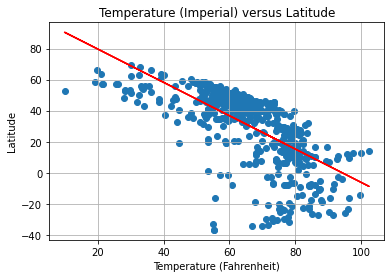

In [10]:
# Build a scatter plot: Temperature (Imperial) versus Latitude

x_values = weather_data["temp"]
y_values = weather_data["lat"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(weather_data["temp"], weather_data["lat"], marker="o")

plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(0,50),fontsize=15,color="red")
plt.xlabel('Temperature (Fahrenheit)')
plt.ylabel('Latitude')
print(f"The r-squared is: {rvalue**2}")
plt.grid(True)
plt.title("Temperature (Imperial) versus Latitude")
# Save the figure
plt.savefig("Output/TemperatureInWorldCities.png")
plt.show()

The r-squared is: 0.03287504131328652


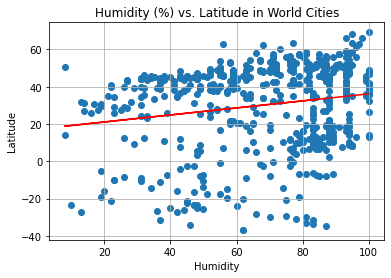

In [11]:
# Build a scatter plot: Humidity (%) vs. Latitude
x_values = weather_data["hum"]
y_values = weather_data["lat"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(weather_data["hum"], weather_data["lat"], marker="o")

plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(0,50),fontsize=15,color="red")
print(f"The r-squared is: {rvalue**2}")
plt.title("Humidity (%) vs. Latitude in World Cities")
plt.xlabel("Humidity")
plt.ylabel("Latitude")
plt.grid(True)
# Save the figure
plt.savefig("Output/HumidityInWorldCities.png")

plt.show()

The r-squared is: 6.757510501528636e-05


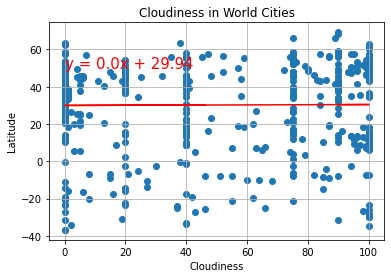

In [12]:
# Build a scatter plot: Cloudiness (%) vs. Latitude
x_values = weather_data["cloud"]
y_values = weather_data["lat"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(weather_data["cloud"], weather_data["lat"], marker="o")

plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(0,50),fontsize=15,color="red")
print(f"The r-squared is: {rvalue**2}")
plt.title("Cloudiness in World Cities")
plt.ylabel("Latitude")
plt.xlabel("Cloudiness")
plt.grid(True)
# Save the figure
plt.savefig("Output/CloudinessInWorldCities.png")

plt.show()

The r-squared is: 0.0034656566957229976


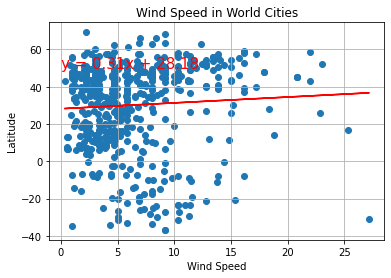

In [13]:
# Build a scatter plot: Wind Speed vs. Latitude
x_values = weather_data["wind"]
y_values = weather_data["lat"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(weather_data["wind"], weather_data["lat"], marker="o")

plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(0,50),fontsize=15,color="red")
print(f"The r-squared is: {rvalue**2}")
plt.title("Wind Speed in World Cities")
plt.ylabel("Latitude")
plt.xlabel("Wind Speed")
plt.grid(True)
# Save the figure
plt.savefig("Output/WindSpeedInWorldCities.png")

plt.show()

In [14]:
weather_data_north=weather_data[weather_data["lat"]>=0]
weather_data_south=weather_data[weather_data["lat"]<0]

In [15]:
weather_data_south

,city,country,lat,lon,temp,hum,cloud,wind
0,ID,Pare,-7.77,112.20,76.55,85,46,4.43
25,ZA,Port Shepstone,-30.74,30.45,74.39,78,19,27.16
30,CL,Concepción,-36.83,-73.05,55.40,62,0,9.17
33,RW,Butare,-2.60,29.74,72.54,68,30,4.65
48,AR,Formosa,-26.18,-58.18,95.00,44,100,6.93
...,...,...,...,...,...,...,...,...
514,AR,San Vicente,-26.62,-54.13,85.08,36,98,4.99
528,ID,Sumedang,-6.86,107.92,73.18,89,15,2.77
533,CL,Rancagua,-34.17,-70.74,69.78,46,2,4.29
556,MG,Moramanga,-18.93,48.20,67.84,79,42,6.85


The r-squared is: 0.5115183618592011


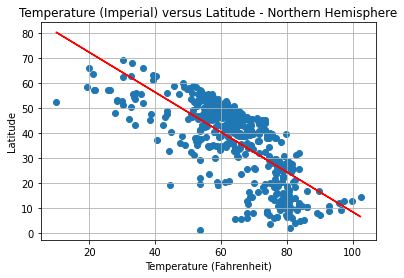

In [16]:
# Build a scatter plot: Temperature (Imperial) versus Latitude - Northern Hemisphere
x_values = weather_data_north["temp"]
y_values = weather_data_north["lat"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(weather_data_north["temp"], weather_data_north["lat"], marker="o")

plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(0,50),fontsize=15,color="red")
plt.xlabel('Temperature (Fahrenheit)')
plt.ylabel('Latitude')
print(f"The r-squared is: {rvalue**2}")
plt.grid(True)
plt.title("Temperature (Imperial) versus Latitude - Northern Hemisphere")
# Save the figure
plt.savefig("Output/TemperatureInWorldCitiesNorthHem.png")
plt.show()

The r-squared is: 0.05085850235659856


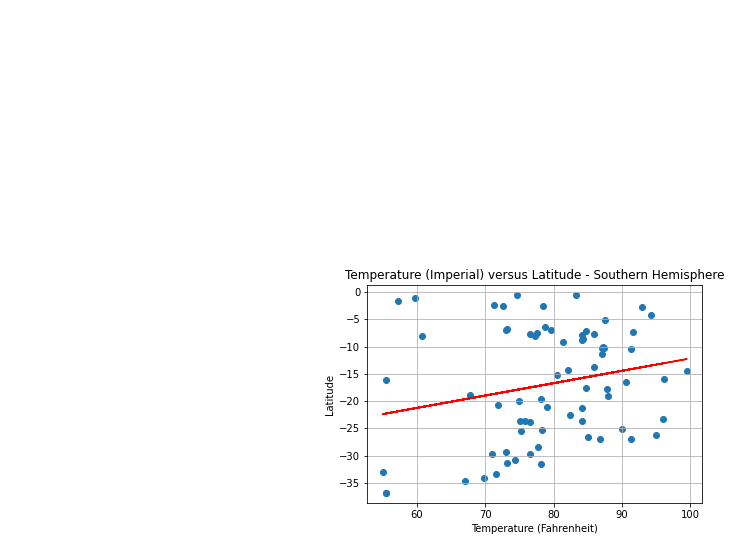

In [17]:
# Build a scatter plot: Temperature (Imperial) versus Latitude - Southern Hemisphere
x_values = weather_data_south["temp"]
y_values = weather_data_south["lat"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(weather_data_south["temp"], weather_data_south["lat"], marker="o")

plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(0,50),fontsize=15,color="red")
plt.xlabel('Temperature (Fahrenheit)')
plt.ylabel('Latitude')
print(f"The r-squared is: {rvalue**2}")
plt.grid(True)
plt.title("Temperature (Imperial) versus Latitude - Southern Hemisphere")
# Save the figure
plt.savefig("Output/TemperatureInWorldCitiesSouthHem.png")
plt.show()

The r-squared is: 0.00017420704857535794


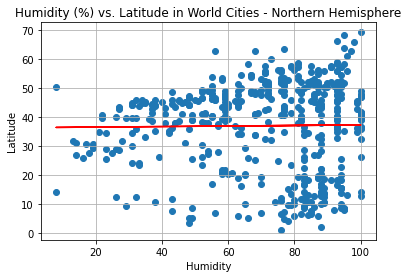

In [18]:
# Build a scatter plot: Humidity (%) vs. Latitude - Northern Hemisphere
x_values = weather_data_north["hum"]
y_values = weather_data_north["lat"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(weather_data_north["hum"], weather_data_north["lat"], marker="o")

plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(0,50),fontsize=15,color="red")
print(f"The r-squared is: {rvalue**2}")
plt.title("Humidity (%) vs. Latitude in World Cities - Northern Hemisphere")
plt.xlabel("Humidity")
plt.ylabel("Latitude")
plt.grid(True)
# Save the figure
plt.savefig("Output/HumidityInWorldCitiesNorthHem.png")

plt.show()

The r-squared is: 7.000913494830333e-05


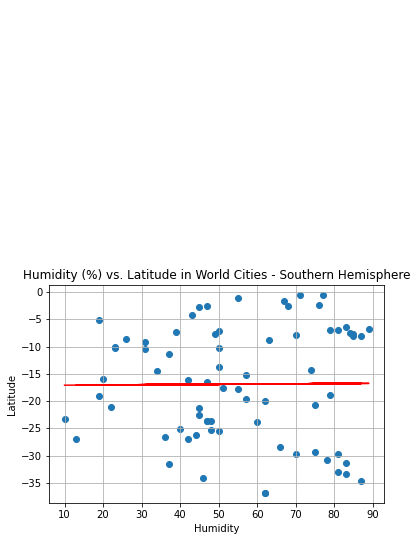

In [19]:
# Build a scatter plot: Humidity (%) vs. Latitude - Southern Hemisphere
x_values = weather_data_south["hum"]
y_values = weather_data_south["lat"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(weather_data_south["hum"], weather_data_south["lat"], marker="o")

plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(0,50),fontsize=15,color="red")
print(f"The r-squared is: {rvalue**2}")
plt.title("Humidity (%) vs. Latitude in World Cities - Southern Hemisphere")
plt.xlabel("Humidity")
plt.ylabel("Latitude")
plt.grid(True)
# Save the figure
plt.savefig("Output/HumidityInWorldCitiesSouthHem.png")

plt.show()

The r-squared is: 0.0017614423400536582


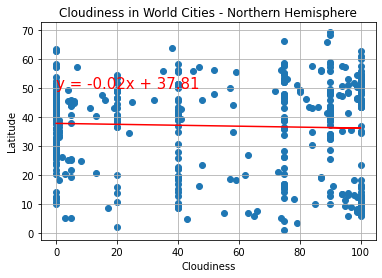

In [20]:
# Build a scatter plot: Cloudiness (%) vs. Latitude - Northern Hemisphere
x_values = weather_data_north["cloud"]
y_values = weather_data_north["lat"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(weather_data_north["cloud"], weather_data_north["lat"], marker="o")

plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(0,50),fontsize=15,color="red")
print(f"The r-squared is: {rvalue**2}")
plt.title("Cloudiness in World Cities - Northern Hemisphere")
plt.ylabel("Latitude")
plt.xlabel("Cloudiness")
plt.grid(True)
# Save the figure
plt.savefig("Output/CloudinessInWorldCitiesNorthHem.png")

plt.show()

The r-squared is: 0.0019907745689387714


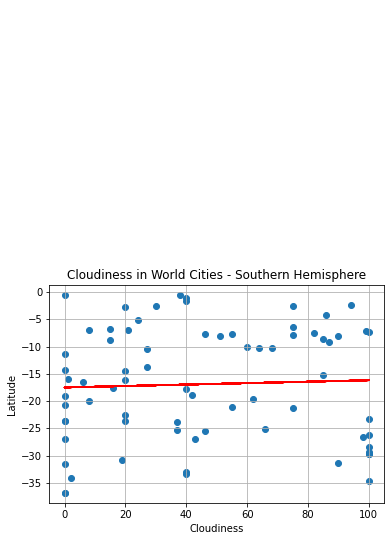

In [21]:
# Build a scatter plot: Cloudiness (%) vs. Latitude - Southern Hemisphere
x_values = weather_data_south["cloud"]
y_values = weather_data_south["lat"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(weather_data_south["cloud"], weather_data_south["lat"], marker="o")

plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(0,50),fontsize=15,color="red")
print(f"The r-squared is: {rvalue**2}")
plt.title("Cloudiness in World Cities - Southern Hemisphere")
plt.ylabel("Latitude")
plt.xlabel("Cloudiness")
plt.grid(True)
# Save the figure
plt.savefig("Output/CloudinessInWorldCitiesSouthHem.png")

plt.show()

The r-squared is: 0.07176771133752484


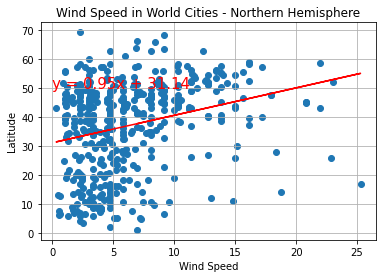

In [22]:
# Build a scatter plot: Wind Speed (mph) vs. Latitude - Northern Hemisphere
x_values = weather_data_north["wind"]
y_values = weather_data_north["lat"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(weather_data_north["wind"], weather_data_north["lat"], marker="o")

plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(0,50),fontsize=15,color="red")
print(f"The r-squared is: {rvalue**2}")
plt.title("Wind Speed in World Cities - Northern Hemisphere")
plt.ylabel("Latitude")
plt.xlabel("Wind Speed")
plt.grid(True)
# Save the figure
plt.savefig("Output/WindSpeedInWorldCitiesNorthHem.png")

plt.show()

The r-squared is: 0.02282240494201373


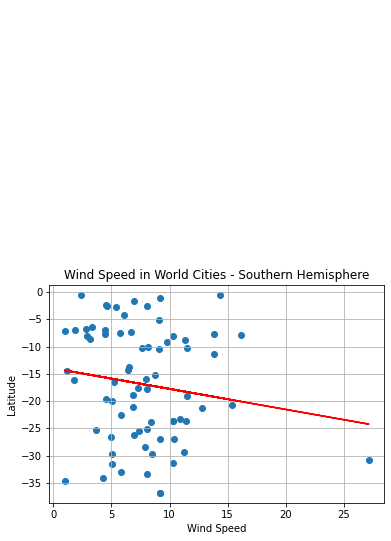

In [23]:
# Build a scatter plot: Wind Speed (mph) vs. Latitude - Southern Hemisphere
x_values = weather_data_south["wind"]
y_values = weather_data_south["lat"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(weather_data_south["wind"], weather_data_south["lat"], marker="o")

plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(0,50),fontsize=15,color="red")
print(f"The r-squared is: {rvalue**2}")
plt.title("Wind Speed in World Cities - Southern Hemisphere")
plt.ylabel("Latitude")
plt.xlabel("Wind Speed")
plt.grid(True)
# Save the figure
plt.savefig("Output/WindSpeedInWorldCitiesSouthHem.png")

plt.show()